# TP: reconnaissance de forme

# 1.	Segmentation




<h4>Premiere Segmentation<h4>

In [4]:
import matplotlib.pyplot as plt 
%matplotlib inline
from skimage import data,filters
import cv2
import numpy

def TraceContour0(filename):
    image = cv2.imread('./img/'+filename,0)
    #print(image.shape)
    #plt.imshow(image)

    edges = filters.sobel(image)
    #numpy.savetxt("edges.csv", edges, delimiter=",")

    try:
        cv2.imwrite('./Contour0/Contour_'+filename, edges)
        #print("Image Saved !")
    except:
        print("Error")
    plt.imshow(edges)

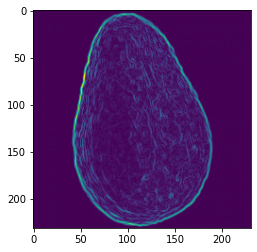

In [5]:
TraceContour0("avocat_001.jpg")

<h4>Deuxième Segmentation<h4>

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def TraceContour1(filename, seuil):

    im_gray = cv2.imread('./img/'+filename, cv2.IMREAD_GRAYSCALE)

    newImg = cv2.split(im_gray)[0]
    #cv2.imshow('ImgGris.jpg', newImg)

    (treshold, newImg) = cv2.threshold(newImg, int(seuil), 255, cv2.THRESH_BINARY)

    #On copy l'image après avoir fait les contours
    CpContour = newImg.copy()
    #On récupère les dimensions de cette image (longueur/hauteur) en pixel
    h, w = newImg.shape[:2]
    #On crée une matrice mask remplis de 0 de dimension +2 
    mask = np.zeros((h+2, w+2), np.uint8)
    #On applique un floodFill (un remplissage de trou) sur l'image en paramètre 
        #Ici on récupère la forme en noir sur fond blanc
    cv2.floodFill(CpContour, mask, (0,0), 255);
    #On inverse les bits afin d'avoir la forme en blanc sur fond noir
    CpContour_inv = cv2.bitwise_not(CpContour)

    #cv2.imshow("Image remplis", CpContour)
    #cv2.imshow("Invese image remplis", CpContour_inv)

    #Création des matrice de kernel
        #Plus la matrice est grande plus les points sont 'gros'
    kernelClose = np.ones((30,30), np.uint8)
    kernelContour = np.ones((3, 3), np.uint8)

    #On effectue un close sur la forme en blanc sur fond noir
    closingImg = cv2.morphologyEx(CpContour_inv, cv2.MORPH_CLOSE, kernelClose)
    #cv2.imshow('Close.jpg', closingImg)

    #On effectue un gradient morphologique sur l'image
    newImg = cv2.morphologyEx(newImg, cv2.MORPH_GRADIENT, kernelContour)
    
    contours,hierarchy = cv2.findContours(newImg, 1, 2)
    cnt = contours[0]
    M = cv2.moments(cnt)
    #print(M)
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt,True)
    #print(perimeter)
    epsilon = 0.1*cv2.arcLength(cnt,True)
    approx = cv2.approxPolyDP(cnt,epsilon,True)
    hull = cv2.convexHull(cnt)
    k = cv2.isContourConvex(cnt)
    
    try:
        cv2.imwrite('./Contour1/Contour_'+str(seuil)+'_'+filename, newImg)
        #print("Image Saved !")
    except:
        print("Error")
    #windows
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    plt.imshow(newImg)

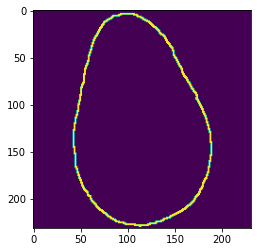

In [7]:
TraceContour1("avocat_001.jpg", 210)

<h4>Troisième Segmentation<h4>

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def TraceContour2(filename, seuil):

    imageOg = cv2.imread('img/'+filename, cv2.IMREAD_GRAYSCALE)
    newImg = cv2.split(imageOg)[0]
    #cv2.imshow('ImageGris.jpg', newImg)
    (treshold, newImg) = cv2.threshold(newImg, 200, 255, cv2.THRESH_BINARY)
    #On effectue un gradient morphologique sur l'image
    kernelContour = np.ones((3, 3), np.uint8)
    newImg = cv2.morphologyEx(newImg, cv2.MORPH_GRADIENT, kernelContour)
    #cv2.imshow('Contour.jpg', newImg)

    threshold, imageThreshold = cv2.threshold(imageOg, int(seuil), 255, cv2.THRESH_BINARY_INV);
    imageRemplie = imageThreshold.copy()
    h, w = imageThreshold.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)
    cv2.floodFill(imageRemplie, mask, (0,0), 255);
    imageRemplieInverse = cv2.bitwise_not(imageRemplie)
    ImageCombine = imageThreshold | imageRemplieInverse
    #cv2.imshow("Image avec bruit", imageThreshold)
    #cv2.imshow("Image remplie", imageRemplie)
    #cv2.imshow("Image bruit inverse", imageRemplieInverse)
    #cv2.imshow("Resultat", ImageCombine)
    
    #contours, hierarchy = cv2.findContours(ImageCombine, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    #cv2.drawContours(ImageCombine, contours, 0, (0,255,0), 3)
    #cv2.imshow( "Components", ImageCombine );

    
    try:
        cv2.imwrite('./Contour2/Contour_'+str(seuil)+'_'+filename, ImageCombine)
        #print("Image Saved !")
    except:
        print("Error")    
    
    #windows
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    plt.imshow(ImageCombine)

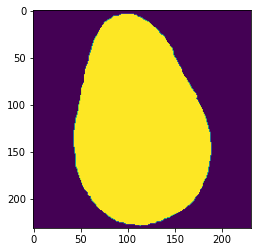

In [9]:
TraceContour2("avocat_001.jpg", 210)

<h2>Discussion<h2>

<font color='red'>Résultats (contours superposés aux images initiales) et commentaires :


Chacune de nos méthode de segmentation est différentes, mais nous en fin de celle-ci nous pouvons distinguer la forme du fruit/legume de l'image initiale

<font color='red'>Points forts et points faibles de la méthode :

Nos points fort sont que selon la qualité des images nous avons des contours qui sont plus ou moins parfait et que chaque méthode renvoi une forme reconnaissble de l'élément

Nos points faible sont que si l'image contient des ombres, ceux la peuvent alterer la segmentation et renvoyer un contours biaisé. Un second point faible est que le fond de l'image doit être blanc afin de pouvoir effetuer la segmentation

<font color='red'>Pistes d’amélioration :

Comme amélioration, on pourrait implémenter une dectection du fond, peu importe la couleur de celui-ci 

On pourrait essayer d'extraire plus de données en fonction de la segmentation, tel que la forme global (cercle, ovale, carré, rectangle, ...)

# 2. Choix et calculs des attributs

<h2>Nos Imports<h2>

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import argparse
import cv2
import numpy as np
import os
import pandas as pd
import sys
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

<h2>Nos fonctions<h2>

In [11]:
def plot_colors(hist, centroids, listOfColor):
    """
    @Param 1 : list hist
    @Param 2 : list centroids
    @Param 3 : list listOfColor
    
    return list, list, list
    
    ------------------
    
    Cette fonction va initialiser le graphique à barres représentant la fréquence relative de chacune des couleurs
    """    

    #seuil en RGB a partir du quel on ne souhaite plus avoir la couleur
    tresh=210

    bar = np.zeros((50, 300, 3), dtype = "uint8")
    debut = 0
    #Boucle sur le pourcentage de chaque cluster et la couleur de chaque cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        #print(percent, color)
        fin = debut + (percent * 300)
        cv2.rectangle(bar, (int(debut), 0), (int(fin), 50),
            color.astype("uint8").tolist(), -1)
        debut = fin
        if ((int(color[0]) > tresh) and (int(color[1]) > tresh) and (int(color[2]) > tresh)) :
            None
        else:
            listOfColor.append(color)

    return bar, listOfColor[0], listOfColor[1]

In [12]:
def centroid_histogram(clt):
    """
    @Param 1 : sklearn.cluster._kmeans.KMeans clt

    return list
    
    ------------------
    
    Cette fonction va saisir le nombre de clusters différents et créer un histogramme basé sur le nombre de pixels affectés à chaque cluster
    """    
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)
    
    # normaliser l'histogramme, de manière à ce que sa somme soit égale à un
    hist = hist.astype("float")
    hist /= hist.sum()

    return hist


In [13]:
def getImageColor(filename):
    """
    @Param 1 : String filename

    return list, list
    
    ------------------
    
    Cette fonction sert a trouver les couleurs dominantes sur l'image en parametre
    Elle retourne deux liste contenant le taux de rouge, vert, bleu de chaque couleurs prédominantes
    """    
    
    listOfColor=[]

    image = cv2.imread(filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # reshape the image to be a list of pixels
    image = image.reshape((image.shape[0] * image.shape[1], 3))

    # cluster the pixel intensities
    clt = KMeans(n_clusters = 3)
    clt.fit(image)
    # build a histogram of clusters and then create a figure
    # representing the number of pixels labeled to each color
    hist = centroid_histogram(clt)
    bar, listOfColor[0], listOfColor[1] = plot_colors(hist, clt.cluster_centers_,listOfColor)
    
    return listOfColor[0], listOfColor[1]

In [14]:
def elongation(mu20, mu02, mu11):
    """
    @Param 1 : float mu20
    @Param 2 : float mu02
    @Param 3 : float mu11


    return float
    
    ------------------
    
    Cette fonction sert a calculer l'elongation de la forme avec les float mis en parametre
    """    
    x = mu20 + mu02
    y = 4 * mu11**2 + (mu20 - mu02)**2
    return (x + y**0.5) / (x - y**0.5)

In [15]:
def getElongation(filename):
    """
    @Param 1 : String filename

    return float, dict
    
    ------------------
    
    Cette fonction sert a recuperer les moments de l'image mise en parametre et de calculer l'elongation de la forme
    Elle retourne la valeur de l'elongation ainsi que le dictionnaire genere par cv2.moments(img)
    """    
    img = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_RGB2GRAY)
    # Assuming input has grayscale dark contours:
    img = 255 - cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)[1]
    plt.imshow(img)
    m = cv2.moments(img)

    m1, m2, m3 = round(m['mu20'], 3), round(m['mu02'], 3), round(m['mu11'], 3)
    return elongation(m1, m2, m3), m

In [16]:
def appendNewRowToDF(color1, color2, elong, m, label):
    """
    @Param 1 : list color1
    @Param 2 : list color2
    @Param 3 : float elong
    @Param 4 : dict m
    @Param 5 : String label

    return list
    
    ------------------
    
    Cette fonction sert a mettre en forme la liste d'information que l'on souhaite ajouter a la liste global des données   
    """
    nouvelleLigne=[color1[0], 
               color1[1], 
               color1[2], 
               color2[0], 
               color2[1], 
               color2[2], 
               elong,  
               label]
    return nouvelleLigne

In [17]:
def getInfo(filename):
    """
    @Param 1 : String filename
   
    ------------------
    Cette fonction avait pour but de calculer différents attributs en fonctions des cv2.moments de l'image
    """
    img = cv2.imread(filename)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    _, thresh = cv2.threshold(img_gray, 210, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    delta_squared = np.diff(contours[0], axis=0)*np.diff(contours[0], axis=0)
    perimeter = np.sum(np.sqrt(np.sum(delta_squared, axis=1)))
    perimeter = cv2.arcLength(contours[0], True)
    area = cv2.contourArea(contours[0])
    alpha = 4*np.pi*area/(perimeter**2)


<h2>Main<h2>

[47.240960586123094, 57.9656061325541, 33.57987924834765, 100.9453199365392, 120.78635642517347, 83.7954521417239, 2.5804676911389466, 'avocat']
[40.19079817283847, 46.93671114315282, 32.80634691666873, 94.09352644746691, 102.03435881172315, 83.11012439650341, 2.52715027061054, 'avocat']
[131.43402630462458, 141.48159736953764, 108.77837293169082, 45.69077182876549, 57.429240753595906, 31.31768815603712, 3.040503122098872, 'avocat']
[35.53420544713836, 32.01958681822137, 20.03281149475336, 156.44227517294337, 153.57109915449715, 114.45918524212232, 2.0215057771303737, 'avocat']
[30.51191100850076, 32.35932416832827, 32.89369293734691, 69.693349168646, 72.48741092636581, 73.71876484560411, 2.6635781699433876, 'avocat']
[56.30562866119331, 53.07481231732544, 36.66808969963263, 160.52662899892636, 158.2214941536499, 122.58367992884347, 2.0120188996458888, 'avocat']
[118.90082880822929, 105.55615890254415, 105.78522434981294, 55.441625363848885, 42.92659900873929, 42.33903705451203, 1.7758

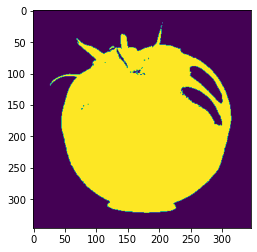

In [18]:
directory = os.fsencode("./img/")

#Entete des colononnes pour la creation du CSV
columnsNames = ['color1_R', 'color1_G', 'color1_B', 
                'color2_R', 'color2_G', 'color2_B',
                'elongation', 'label']

allData=[]
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"): 
            #Premiere methode de segmentation
        #TraceContour0(filename)
            #Deuxieme methode de segmentation
        #TraceContour1(filename, 210)
            #Troisieme methode de segmentation
        #TraceContour2(filename, 210)
            #Recuperation des couleurs dominantes de l'image
        color1, color2 = getImageColor("./img/"+filename)
            #Recuperation de l'elongation de l'image
        elong, mom = getElongation("./img/"+filename)
            #Recuperation d'attribut en fonction des moments
        #getInfo("./img/"+filename)
            #Creation d'une nouvelle ligne dans une liste avec toutes les informations recupéré sur l'image
        newRow=appendNewRowToDF(color1, color2, elong, mom, filename.split("_")[0])
        print(newRow)
        allData.append(newRow)
    else:
        continue

#Creation d'un dataframe avec les informations recuperer sur chaque image
df = pd.DataFrame(allData, columns=columnsNames, dtype = float) 
#Sauvegarde des donnes au format CSV pour pouvoir les réutiliser
df.to_csv('Data.csv', index=None)  

<font color='red'>Choix des attributs + justification :

Nous avons choisi comme attribut les couleur prédominantes de l'images en excluant le fond blanc. Nous avons aussi choisi l'élongation de la forme de l'élément

En se basant sur les couleurs prédominantes, on peut dinstinguer les couleurs principales d'un fruit/légume

En se basant sur l'élongation on peut avoir une idée de la forme de l'élément

<font color='red'>Méthode de calcul et mise en œuvre :


Pour la couleur, nous avons les 3 fonctions suivante ; plot_colors(), centroid_histogram(), getImageColor().

Celles-ci permettent globalement de recuperer une image et son histogramme de couleur et de sortir les couleurs dominantes tout en excluant la couleur blanche si celle-ci est dans les 3 couleurs dominantes de l'image. On recupère alors les valeurs des taux de rouges, vert, bleu de chaque couleur dominantes

Pour l'élongation on récupère seulement les moments que l'on souhaite de l'image et on effectue de calcul de l'elongation

# 3. Classification

<h2>Code de la classification<h2>

In [37]:
# On récupère les données dans un dataframe
dfFeature = pd.read_csv("./Data.csv")
array = dfFeature.values
# On stock dans X toutes les valeurs sauf les labels
X = array[:,0:len(dfFeature.columns)-1]
# On stock dans Y seulement les labels
Y = array[:,len(dfFeature.columns)-1]

#Séparation en apprentissage et validation
Xtrain, Xvalidate, Ytrain, Yvalidate = train_test_split(X,Y,test_size=0.3)  

#Classifieur KNN
one_NN = KNeighborsClassifier(n_neighbors=1)
one_NN.fit(Xtrain, Ytrain)
print('accuraccy on training set:', one_NN.score(Xtrain, Ytrain))
print('accuraccy on validate set:', one_NN.score(Xvalidate,Yvalidate))

yPredValidate = one_NN.predict(Xvalidate)
metrics.confusion_matrix(Yvalidate, yPredValidate)
#Affichage de la matrice de convolution
print(metrics.confusion_matrix(Yvalidate, yPredValidate))

accuraccy on training set: 1.0
accuraccy on validate set: 0.8823529411764706
[[1 0 0 0 0 0]
 [0 1 1 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 3 0 1]
 [0 0 0 0 2 0]
 [0 0 0 0 0 5]]


<font color='red'>Méthode choisie et mise en oeuvre :

Nous avons choisi d'utiliser la méthode de KNeighborsClassifier<br>
On passe nos images dans le classifieur qui va chercher à identifier le fruit. <br>
On a ajouté une colonne label, qui reprend le nom du fichier afin de récupérer le label du fruit. <br>
Les images sont séparées en 2 dataset, Train et Validation. <br>
Train permet d'entraîner le KNN et Validation permet de tester les performances du classifieur. <br>
Pour notre classifieur on choisi de prendre 1 voisin, et on sépare notre dataset en 70% Train et 30% Validate. 


<font color='red'>Résultat obtenu et commentaire :

On recupère alors une matrice de confusion ainsi que les score de notre apprentissage<br>
Les score de notre validation peut être biaisé en fonction de notre split car si celui-ci ne prend pas en compte tout les fruit/legume alors on aura un taux d'erreur plus élévé que lorque tout les label sont prit<br>
Cela est observable directement sur la matrice de confusion qui devient une matrice inférieur au nombre de label total qu'on a (ici la matrice (6,6) devient (5,5))<br>
Dans le cas d'une matrice avec tout les label, nous avons un score qui varie énormement dû au faible nombre d'image car lorsque nous avons quelques mauvaises classification cela impacte fortement le taux de réussite

# 4. Discussion

<font color='red'>Les images fournies sont-elles réalistes et représentatives de la situation évoquée en introduction ? Pourquoi ? Que seraient pour vous des images réalistes et comment se différencieraient-elles des images fournies ? Quelles difficultés supplémentaires prévoyez-vous pour les différentes étapes de votre algorithme ?


Les images fournies ne sont pas vraiment représentatives de la situation de l'introduction car elle sont sur fond blanc, de plus les clients ne pèsent pas leurs fruit/legumes a l'unité et pour finir dans le cas de la situation évoquée on aurait pu avoir un attribut supplémentaires qui est le poids à l'unité en fonction de la détection du nombre d'élément sur la balance et le poids total

Une image réaliste serait donc une image avec plusieurs fruits/legumes sur la même images

Pour notre algorithme, on peut admettre que la camera est bien calibrer et prend seulent tout le socle en photo et selon notre amélioration indiqué dans la partie Segmentation on pourrait alors supprimé le fond pôur récupérer seulement les formes de l'élément pesé.<br>
De plus la luminosité dans un supermarché enleverai le facteur d'ombre sur les éléments pesé ,qui nous pose problème dans la dectection de la forme, ou le diminuerait<br>
La difficulté serait alors de pouvoir compter le nombre d'élément pesé pour pouvoir essayer d'obtenir un ratio poid/unité et donc améliorer la recheche du fruit ou légume avec ce nouvel attribut<br>
Sinon selon moi avec nos attributs de couleurs principales ainsi que l'élongation et l'attribut du poids de tout les éléments ainsi que le ratio poid/unité calculé ferait un bon algorithme de détection de fruits/légumes

<font color='red'>Comparez (sur le principe, pas sur les résultats obtenus) les algorithmes de classification proposés (vous pouvez par exemple dresser un tableau comparatif des deux algorithmes). Lequel vous paraît le plus adapté à la situation évoquée en introduction ? Pourquoi ?

Le Knn supervisé est un algorithme qui permet de donner un label à un élément en fonction de ces features. 
L'alorithme se base sur les éléments voisin afin de faire sa classification.
Ainsi si deux variables ont des features similaire, l'algoritme va lui attribuer le meme label.

Le kmeans va rerouper des données non labélisé afin de les regrouper par similarité.
Cependant il faut spécifier le nombre de label (le nombre de cluster) que l'on souhaite identifier.

Dans notre cas, le Knn semble etre la meilleur option. Nous ne savons pas combient de fruit doivent etre identifier.
C'est pour cela qu'il faut passer à un algorithme supervisé qui apprend à identifier les fruits et leur donne un label. 


<font color='red'>Analysez vos résultats. L’algorithme choisi est-il performant ? Est-il adapté au problème ? Quelles améliorations proposeriez-vous ? Quelles méthodes alternatives proposeriez-vous ?

Nous avons un score variant de 60 à 90% environ. Ce score aussi variable  est du au faible volume de données.
Cependant l'alorithme du Knn n'est peut etre pas le plus adapté à notre usage. 

Pour améliorer l'identification des fruits, il serait peut etre plus approprié de passer pas un algoritme par réseau de neurones.
Il suffirait de passer en entrée les images pour l'apprentissage, ainsi que quelques featutes. On aurrait une meilleur identification.

De plus, nous avons besoin de plus de donnée.
On peut penser a régléer ce problème par des techinque de upsampling afin de générer des données. 
Cependant, nous ne savons pas si cette technique peut s'appliquier a notre cas d'usage.